In [1]:
# Imports
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M
from squigglepy import bayes
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime
print('Loaded...')

Loaded...


In [2]:
# Define model
current_followers = 4480
goal_date = datetime(2022, 11, 1, 0, 0, 0)
days_left = (goal_date - datetime.now()).days

def model():
    mean = sq.sample(sq.norm(80, 500, lclip=0))
    followers = sq.sample(sq.poisson(mean))
    return current_followers + followers

print('Loaded...')

Loaded...


-
Mean: 4770.46, SD: 127.47
-
{1: 4480,
 5: 4560,
 10: 4607,
 20: 4661,
 30: 4701,
 40: 4736,
 50: 4769,
 60: 4802,
 70: 4837,
 80: 4879,
 90: 4936,
 95: 4981,
 99: 5066}


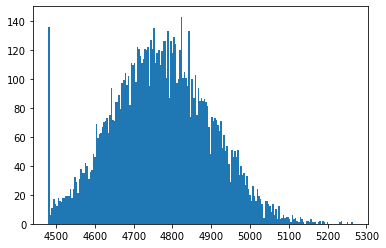

In [3]:
# Sample model
n_samples = 10000
samples = sq.sample(model, n=n_samples)

print('-')
print('Mean: {}, SD: {}'.format(round(np.mean(samples), 2),
                                round(np.std(samples), 2)))
print('-')
plt.hist(samples, bins=200)
pprint(sq.get_percentiles(samples, digits=0))


In [4]:
print(days_left)

29


In [5]:
for target in [4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 5000]:
    print('{} - {}%'.format(target, int(sum([s >= target for s in samples]) / len(samples) * 100)))

4550 - 95%
4600 - 91%
4650 - 82%
4700 - 70%
4750 - 55%
4800 - 40%
4850 - 26%
4900 - 16%
5000 - 3%
